# TP1

In [15]:
import pandas as pd

def loadData(file):
    # Charger les données CSV en spécifiant les noms de colonnes
    data = pd.read_csv(file, index_col=3,  
                       names=['gender', 'genderLooking', 'age', 'name', 'counts_details', 'counts_pictures', 
                              'counts_profileVisits', 'counts_kisses', 'counts_fans', 'counts_g', 
                              'flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date', 
                              'country', 'city', 'location', 'distance', 'isFlirtstar', 'isHighlighted', 
                              'isInfluencer', 'isMobile', 'isNew', 'isOnline', 'isVip', 'lang_count', 
                              'lang_fr', 'lang_en', 'lang_de', 'lang_it', 'lang_es', 'lang_pt', 'verified', 
                              'shareProfileEnabled', 'lastOnlineDate', 'lastOnlineTime', 'birthd', 'crypt', 
                              'freetext', 'whazzup', 'userId', 'pictureId', 'isSystemProfile'])
    
   
    # CONVERSION DE TYPES DE DONNÉES
   
    # Identifier les colonnes booléennes
    colonnes_boolean = data.select_dtypes(include='bool').columns

    # Convertir les colonnes booléennes en valeurs binaires (1 pour True, 0 pour False)
    data[colonnes_boolean] = data[colonnes_boolean].astype(int)
   
    # Convertir les colonnes 'counts_profileVisits' et 'counts_kisses' en numériques
    data['age'] = pd.to_numeric(data['age'], errors='coerce')
    data['counts_details'] = pd.to_numeric(data['counts_details'], errors='coerce')
    data['counts_pictures'] = pd.to_numeric(data['counts_pictures'], errors='coerce')
    data['counts_profileVisits'] = pd.to_numeric(data['counts_profileVisits'], errors='coerce')
    data['counts_kisses'] = pd.to_numeric(data['counts_kisses'], errors='coerce')    
    data['counts_fans'] = pd.to_numeric(data['counts_fans'], errors='coerce')
    data['counts_g'] = pd.to_numeric(data['counts_g'], errors='coerce')
    data['distance'] = pd.to_numeric(data['distance'], errors='coerce')
    data['isFlirtstar'] = pd.to_numeric(data['isFlirtstar'], errors='coerce')
    data['isHighlighted'] = pd.to_numeric(data['isHighlighted'], errors='coerce')
    data['isMobile'] = pd.to_numeric(data['isMobile'], errors='coerce')
    data['isNew'] = pd.to_numeric(data['isNew'], errors='coerce')
    data['isOnline'] = pd.to_numeric(data['isOnline'], errors='coerce')
    data['isVip'] = pd.to_numeric(data['isVip'], errors='coerce')
    data['lang_count'] = pd.to_numeric(data['lang_count'], errors='coerce')
    data['verified'] = pd.to_numeric(data['verified'], errors='coerce')
    data['shareProfileEnabled'] = pd.to_numeric(data['shareProfileEnabled'], errors='coerce')

    return data

# Charger les données depuis le fichier CSV
dataset = loadData("lovoo_v3_users_api-results.csv")
    
# SUPPRESSION DES DONNÉES EN DOUBLON 

# Filtrer les enregistrements qui ne sont pas en double ou où pictureId est vide
dataset_unique = dataset[~dataset['pictureId'].duplicated() | dataset['pictureId'].isnull()]

# Affecter les résultats uniques au jeu de données d'origine
dataset = dataset_unique.copy()

# CRÉATION DE NOUVELLES CARACTÉRISTIQUES : 

# Calculer le taux de bisous par visite et arrondir à deux décimales
dataset['taux_aime'] = (dataset['counts_kisses'] / dataset['counts_profileVisits'] * 100).round(2)

# CONVERSION DES DONNÉES BINAIRES : 

# Mapping des valeurs
mapping = {'true': 1, 'false': 0}

# Appliquer le mapping à chaque colonne
dataset['flirtInterests_chat'] = dataset['flirtInterests_chat'].replace(mapping)
dataset['flirtInterests_chat'] = pd.to_numeric(dataset['flirtInterests_chat'], errors='coerce')  

dataset['flirtInterests_friends'] = dataset['flirtInterests_friends'].replace(mapping)
dataset['flirtInterests_friends'] = pd.to_numeric(dataset['flirtInterests_friends'], errors='coerce')  

dataset['flirtInterests_date'] = dataset['flirtInterests_date'].replace(mapping)
dataset['flirtInterests_date'] = pd.to_numeric(dataset['flirtInterests_date'], errors='coerce')  

# DISCRÉTISATION

# Discrétisation de la variable taux_aime dans une nouvelle colonne 'aime_5_pct', selon les conditions spécifiées
dataset['aime_5_pct'] = dataset['taux_aime'].apply(lambda x: 0 if x < 5 else 1)

# Discrétisation de la variable counts_profileVisits dans une nouvelle colonne '10_visites' selon les conditions spécifiées
dataset['10_visites'] = dataset['counts_profileVisits'].apply(lambda x: 0 if x < 10 else 1)  

# COMPTE POPULAIRE
   
# Créer la nouvelle colonne 'compte_populaire' basée sur les conditions spécifiées
dataset['compte_populaire'] = dataset.apply(lambda row: 1 if row['aime_5_pct'] == 1 and row['10_visites'] == 1 else 0, axis=1)

# Définir les options d'affichage pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes

# Imprimer les premières lignes du DataFrame avec toutes les colonnes
print(dataset.head())

print("\n")

# TOTAL

# Compter combien de fois "populaire" apparaît dans la colonne compte_populaire
count_populaire = dataset['compte_populaire'].value_counts().get(1, 0)

# Afficher le nombre de fois où "populaire" apparaît dans la colonne compte_populaire
print(f'Nombre de valeurs "populaire": {count_populaire}')

# Compter combien de fois "plus_10_visites" apparaît dans la colonne 10_visites
count_plus_10_visites = dataset['10_visites'].value_counts().get(1, 0)

print(f'Nombre de "plus_10_visites": {count_plus_10_visites}')

# Compter combien de fois "plus_5_pct_aime" apparaît dans la colonne aime_5_pct
count_plus_5_pct_aime = dataset['aime_5_pct'].value_counts().get(1, 0)

print(f'Nombre de "plus_5_pct_aime": {count_plus_5_pct_aime}')

# Créer un DataFrame à partir du dataset
df = pd.DataFrame(dataset)

# Imprimer le type de données de la colonne 'compte_populaire'
print(df['compte_populaire'].dtype)

# Créer un DataFrame à partir du dataset
df = pd.DataFrame(dataset)

# Imprimer le type de données de la colonne 'isVip'
print(df['isVip'].dtype)


             gender  genderLooking   age  counts_details  counts_pictures  \
name                                                                        
name         gender  genderLooking   NaN             NaN              NaN   
daeni             F              M  25.0            1.00              4.0   
italiana 92       F              M  22.0            0.85              5.0   
Lauraaa           F              M  21.0            0.00              4.0   
Qqkwmdowlo        F           none  20.0            0.12              3.0   

             counts_profileVisits  counts_kisses  counts_fans  counts_g  \
name                                                                      
name                          NaN            NaN          NaN       NaN   
daeni                      8279.0          239.0          0.0       3.0   
italiana 92                 663.0           13.0          0.0       0.0   
Lauraaa                    1369.0           88.0          0.0       2.0   
Qqkwmdowlo

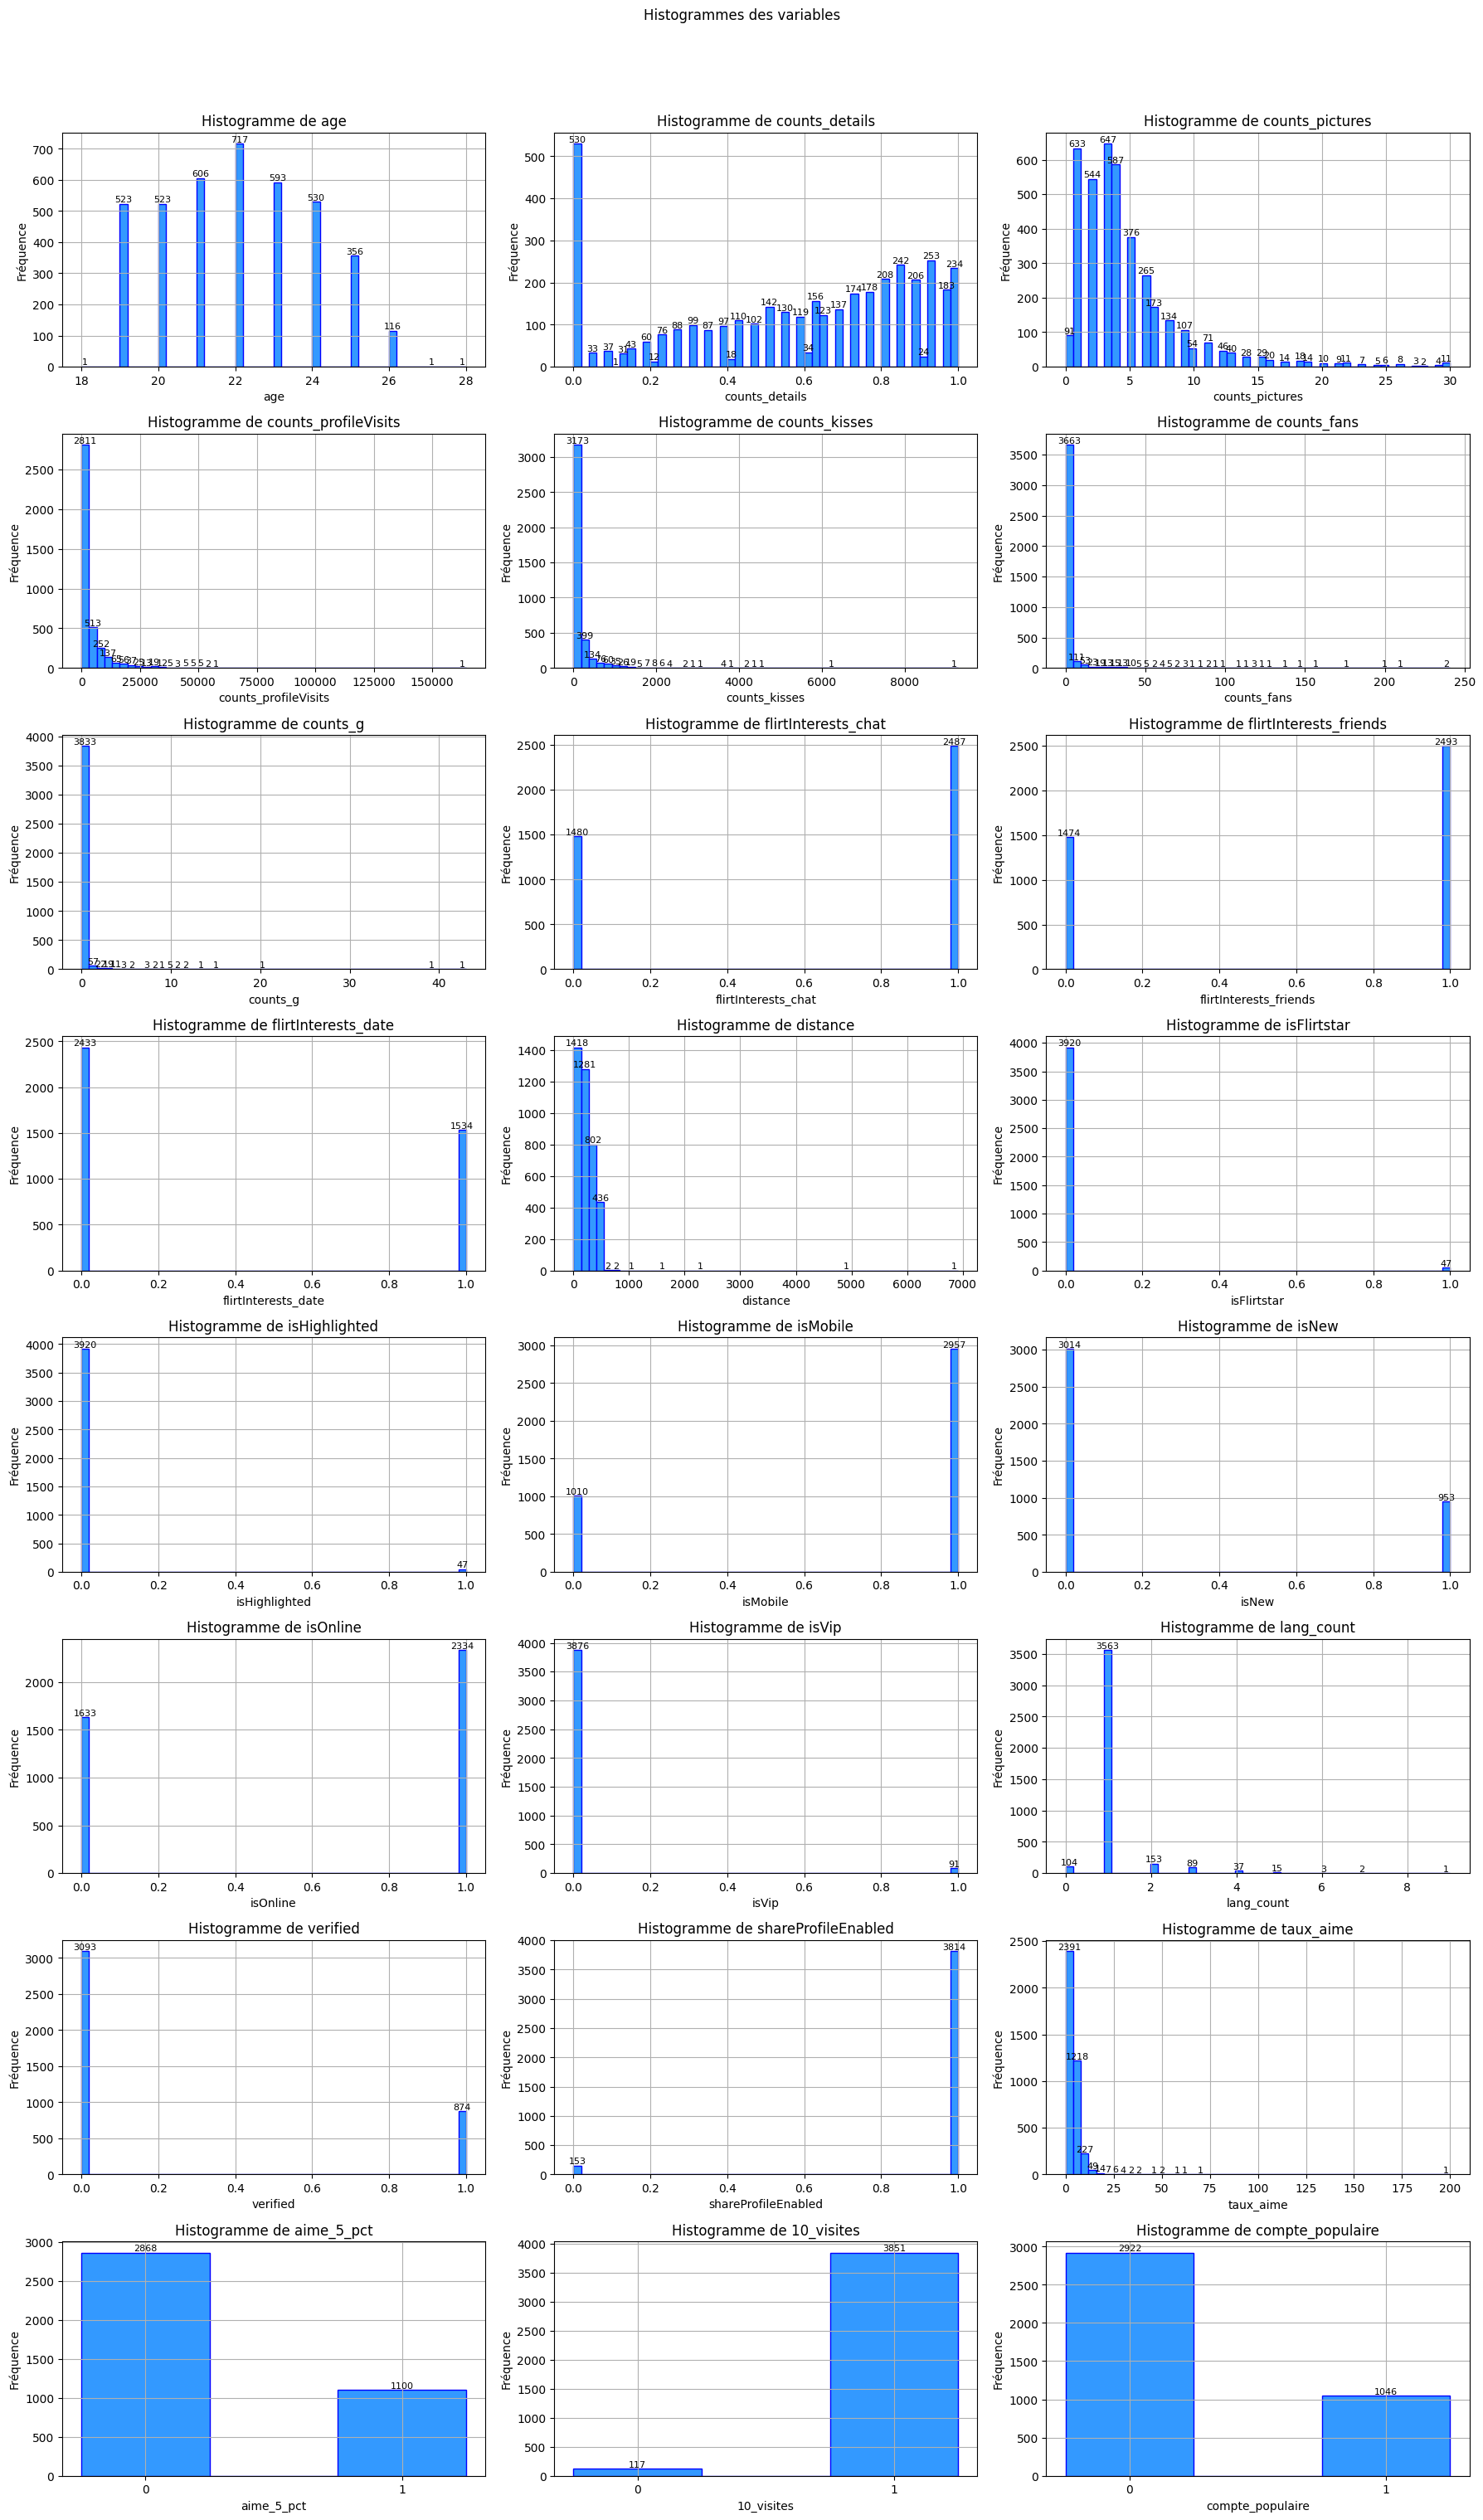

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Importer les bibliothèques nécessaires

# Fonction pour afficher les histogrammes des variables numériques
def afficher_histogrammes(dataset, titre):
    colonnes_numeriques = dataset.select_dtypes(include=['int64', 'float64']).columns[:25]
    
    # Ajuster la taille de la figure pour afficher les histogrammes
    plt.figure(figsize=(18, 40))  # Taille ajustée à 18x40 pouces pour chaque histogramme
    plt.suptitle(titre, y=1.02, fontsize=12)  # Ajouter un titre en haut avec un petit espacement
    
    # Itérer sur chaque colonne sélectionnée du dataset
    for i, col in enumerate(colonnes_numeriques):
        # Créer un subplot pour chaque histogramme
        ax = plt.subplot(11, 3, i + 1)
        
        # Vérifier si la colonne est binaire (0 ou 1)
        if dataset[col].nunique() == 2 and set(dataset[col].unique()) == {0, 1}:
            # Dessiner l'histogramme avec des barres bleues
            counts, bins, _ = ax.hist(dataset[col], bins=[-0.25, 0.25, 0.75, 1.25], color='#3399FF', edgecolor='blue', align='mid')
            plt.xticks([0, 1], ['0', '1'])  # Étiqueter l'axe des x avec 0 et 1
        else:
            # Dessiner l'histogramme avec des barres bleues
            counts, bins, _ = ax.hist(dataset[col], bins=50, color='#3399FF', edgecolor='blue')
        
        plt.title(f'Histogramme de {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Fréquence', fontsize=10)
        plt.grid(True)
        
        # Afficher le nombre total au sommet de chaque barre (uniquement si différent de zéro)
        for count, x in zip(counts, bins):
            if count != 0:
                ax.text(x + (bins[1] - bins[0]) / 2, count + 0.5, int(count), ha='center', va='bottom', fontsize=8, color='black')
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec votre ensemble de données
afficher_histogrammes(dataset, "Histogrammes des variables")


In [17]:
import pandas as pd
import numpy as np


# IDENTIFICATION DES INCOHÉRENCES 

# Filtrer les lignes où counts_bisous est inférieur ou égal à counts_visitesProfil
dataset = dataset[dataset['counts_kisses'] <= dataset['counts_profileVisits']]

# SUPPRESSION DES DONNÉES ABERRANTES 

def remove_outliers(df, col_name, quantile=0.1):
    # Calcul des quartiles Q1 et Q3
    Q1 = df[col_name].quantile(quantile)
    Q3 = df[col_name].quantile(1 - quantile)
    
    # Calcul de l'écart interquartile (IQR)
    IQR = Q3 - Q1
    
    # Calcul des bornes inférieure et supérieure pour identifier les valeurs aberrantes
    limite_inferieure = Q1 - 1.5 * IQR
    limite_superieure = Q3 + 1.5 * IQR
    
    # Filtrage du DataFrame original pour supprimer les valeurs aberrantes
    df_filtre = df[(df[col_name] >= limite_inferieure) & (df[col_name] <= limite_superieure)]
    return df_filtre

# Filtrer les valeurs aberrantes pour chaque colonne spécifiée
dataset = remove_outliers(dataset, 'counts_profileVisits', quantile=0.1)
dataset = remove_outliers(dataset, 'counts_kisses', quantile=0.1)
dataset = remove_outliers(dataset, 'counts_pictures', quantile=0.1)
dataset = remove_outliers(dataset, 'counts_fans', quantile=0.1)
dataset = remove_outliers(dataset, 'taux_aime', quantile=0.1)


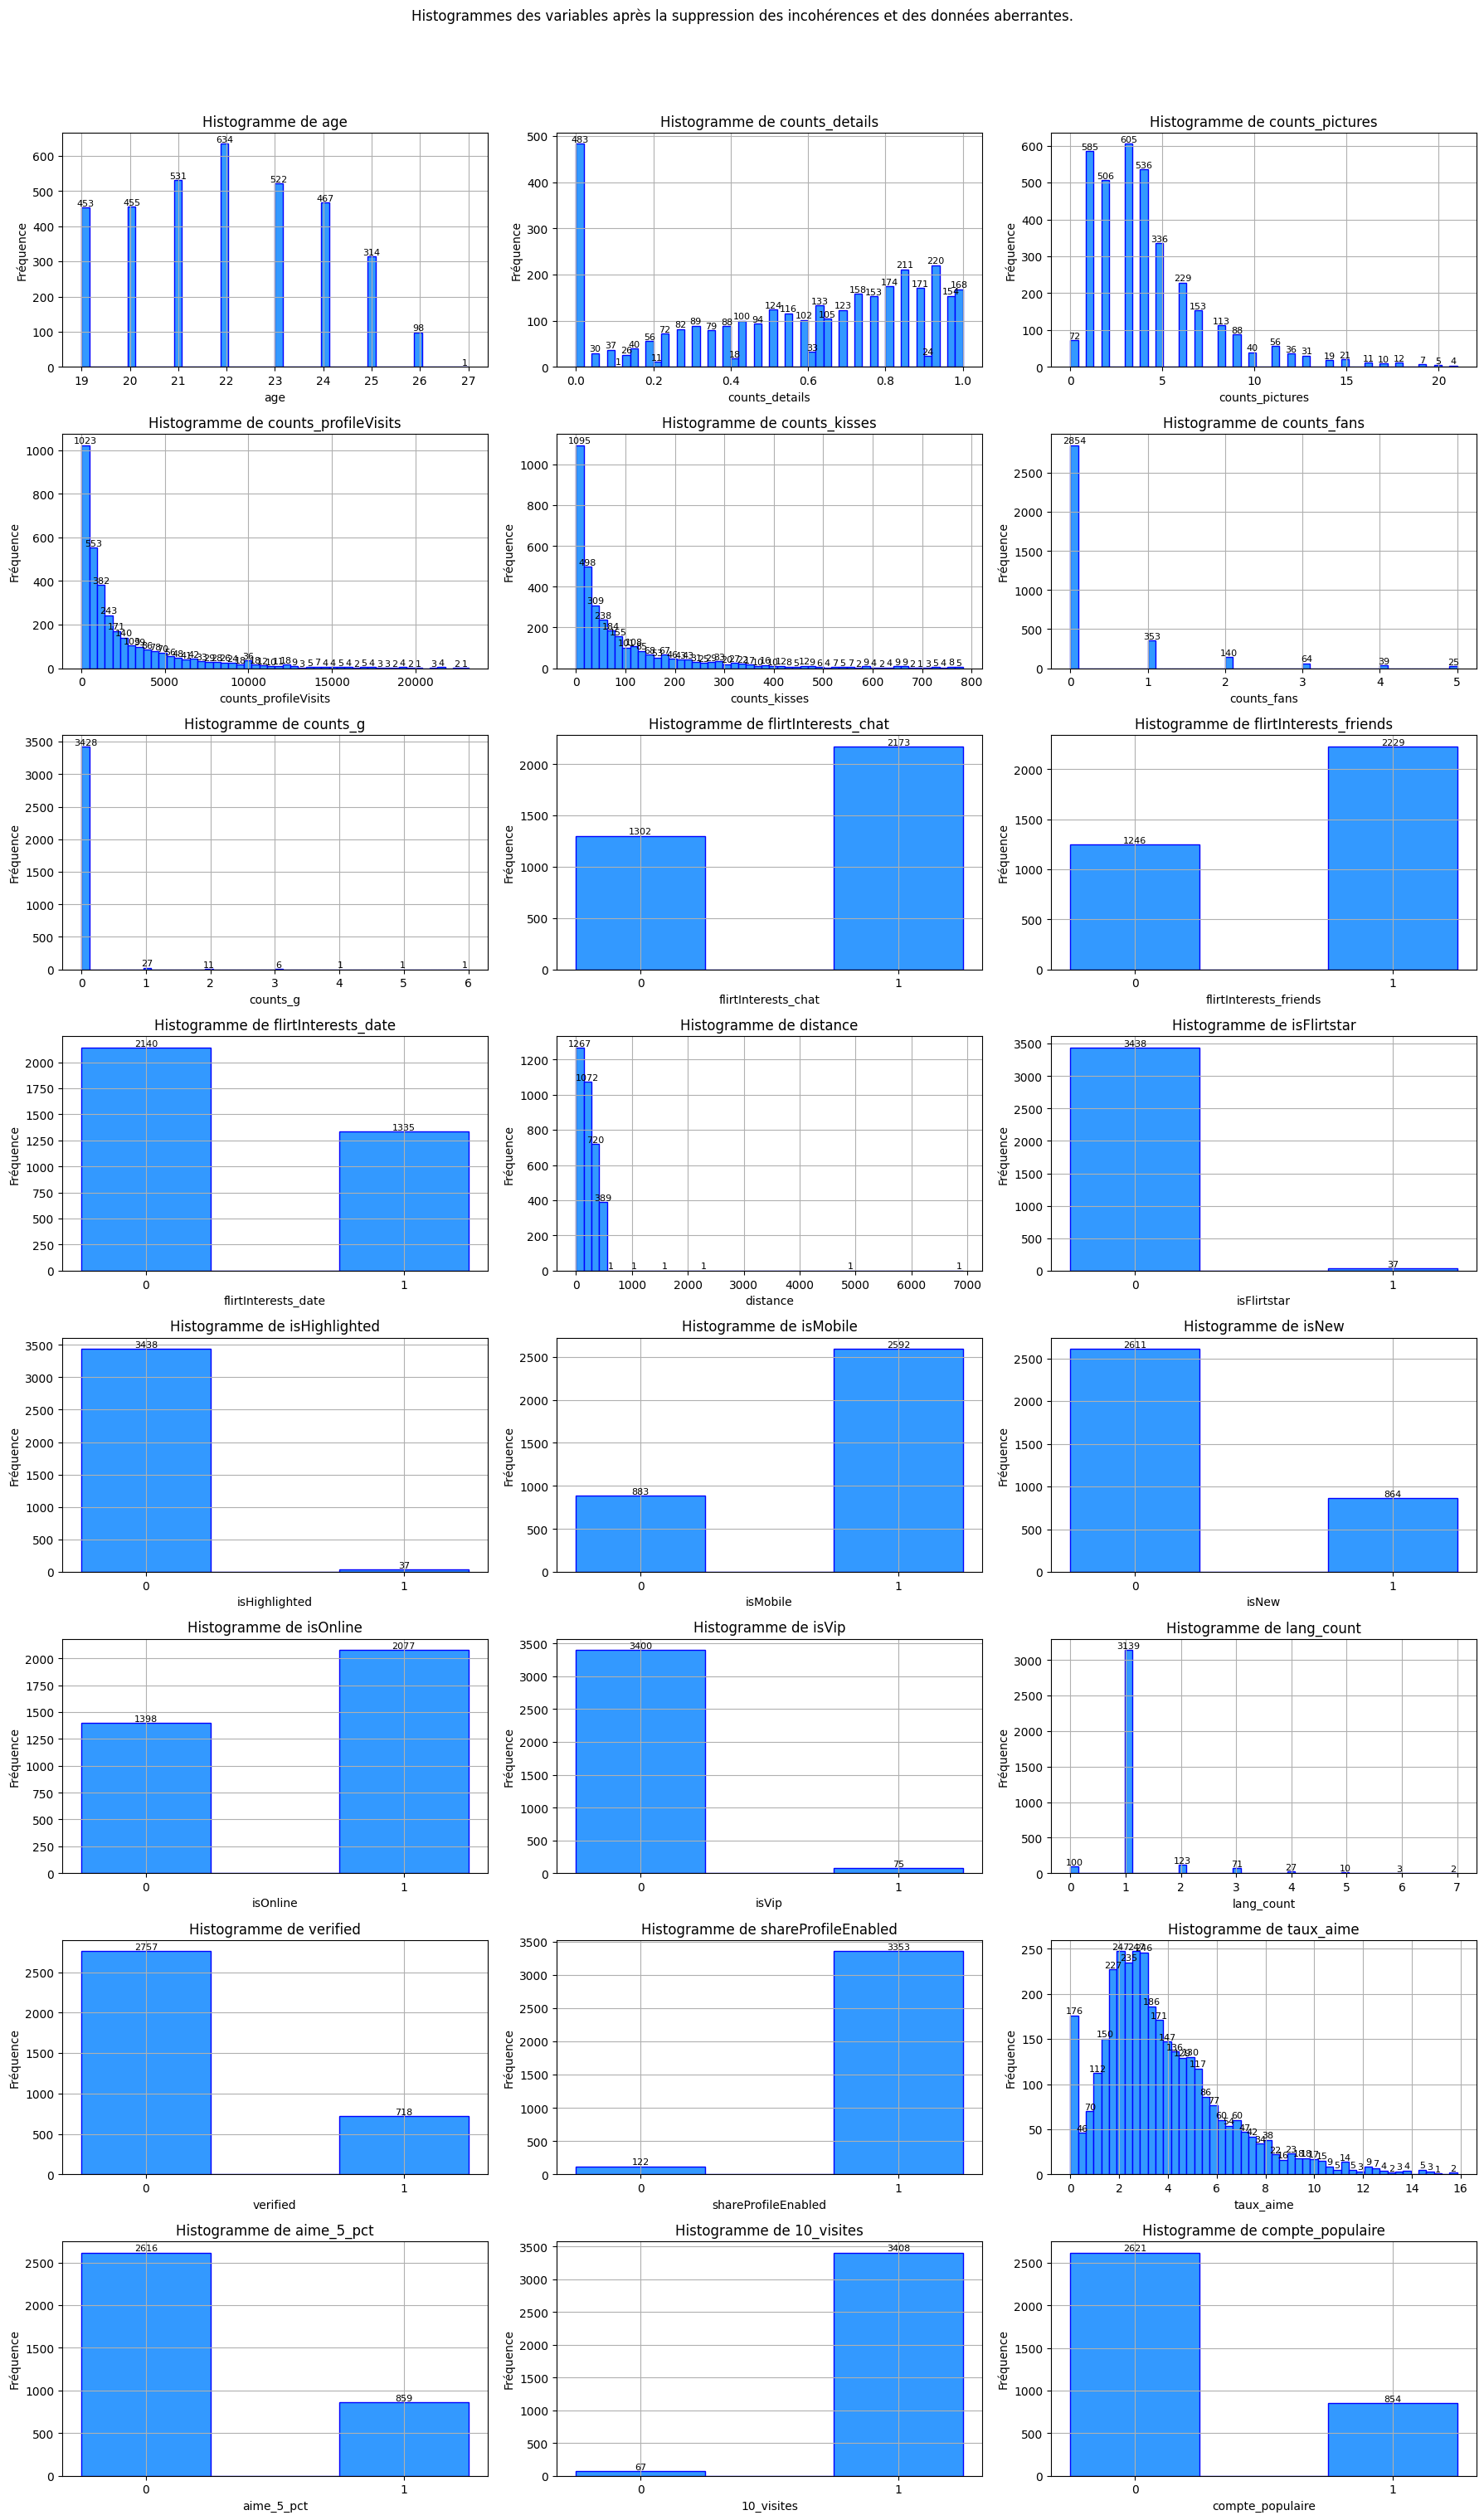

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour afficher les histogrammes des variables numériques
def afficher_histogrammes(dataset, titre):
    colonnes_numeriques = dataset.select_dtypes(include=['int64', 'float64']).columns[:25]
    
    # Ajuster la taille de la figure pour afficher les histogrammes
    plt.figure(figsize=(18, 40))  # Taille ajustée à 18 pouces de largeur et 40 pouces de hauteur pour chaque histogramme
    plt.suptitle(titre, y=1.02, fontsize=12)  # Ajouter un titre en haut avec un petit espacement
    
    # Itérer sur chaque colonne sélectionnée du dataset
    for i, col in enumerate(colonnes_numeriques):
        # Créer un subplot pour chaque histogramme
        ax = plt.subplot(11, 3, i + 1)  # Utilisation de 11 lignes et 3 colonnes pour organiser les sous-graphiques
        
        # Vérifier si la colonne est binaire (0 ou 1)
        if dataset[col].nunique() == 2 and set(dataset[col].unique()) == {0, 1}:
            # Dessiner l'histogramme avec des barres bleues
            counts, bins, _ = ax.hist(dataset[col], bins=[-0.25, 0.25, 0.75, 1.25], color='#3399FF', edgecolor='blue', align='mid')
            plt.xticks([0, 1], ['0', '1'])  # Étiqueter l'axe des x avec 0 et 1
        else:
            # Dessiner l'histogramme avec des barres bleues
            counts, bins, _ = ax.hist(dataset[col], bins=50, color='#3399FF', edgecolor='blue')
        
        plt.title(f'Histogramme de {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Fréquence', fontsize=10)
        plt.grid(True)
        
        # Afficher le total de chaque barre au sommet (uniquement si ce n'est pas zéro)
        for count, x in zip(counts, bins):
            if count != 0:
                ax.text(x + (bins[1] - bins[0]) / 2, count + 0.5, int(count), ha='center', va='bottom', fontsize=8, color='black')
    
    plt.tight_layout()
    plt.show()

afficher_histogrammes(dataset, "Histogrammes des variables après la suppression des incohérences et des données aberrantes.")


In [19]:
# NORMALISATION

# Normaliser la colonne counts_profileVisits
dataset['norm_visites'] = (dataset['counts_profileVisits'] / dataset['counts_profileVisits'].max()).round(3)

# Normaliser la colonne counts_kisses
dataset['norm_kisses'] = (dataset['counts_kisses'] / dataset['counts_kisses'].max()).round(3)



Matrice de corrélation sous forme de heatmap


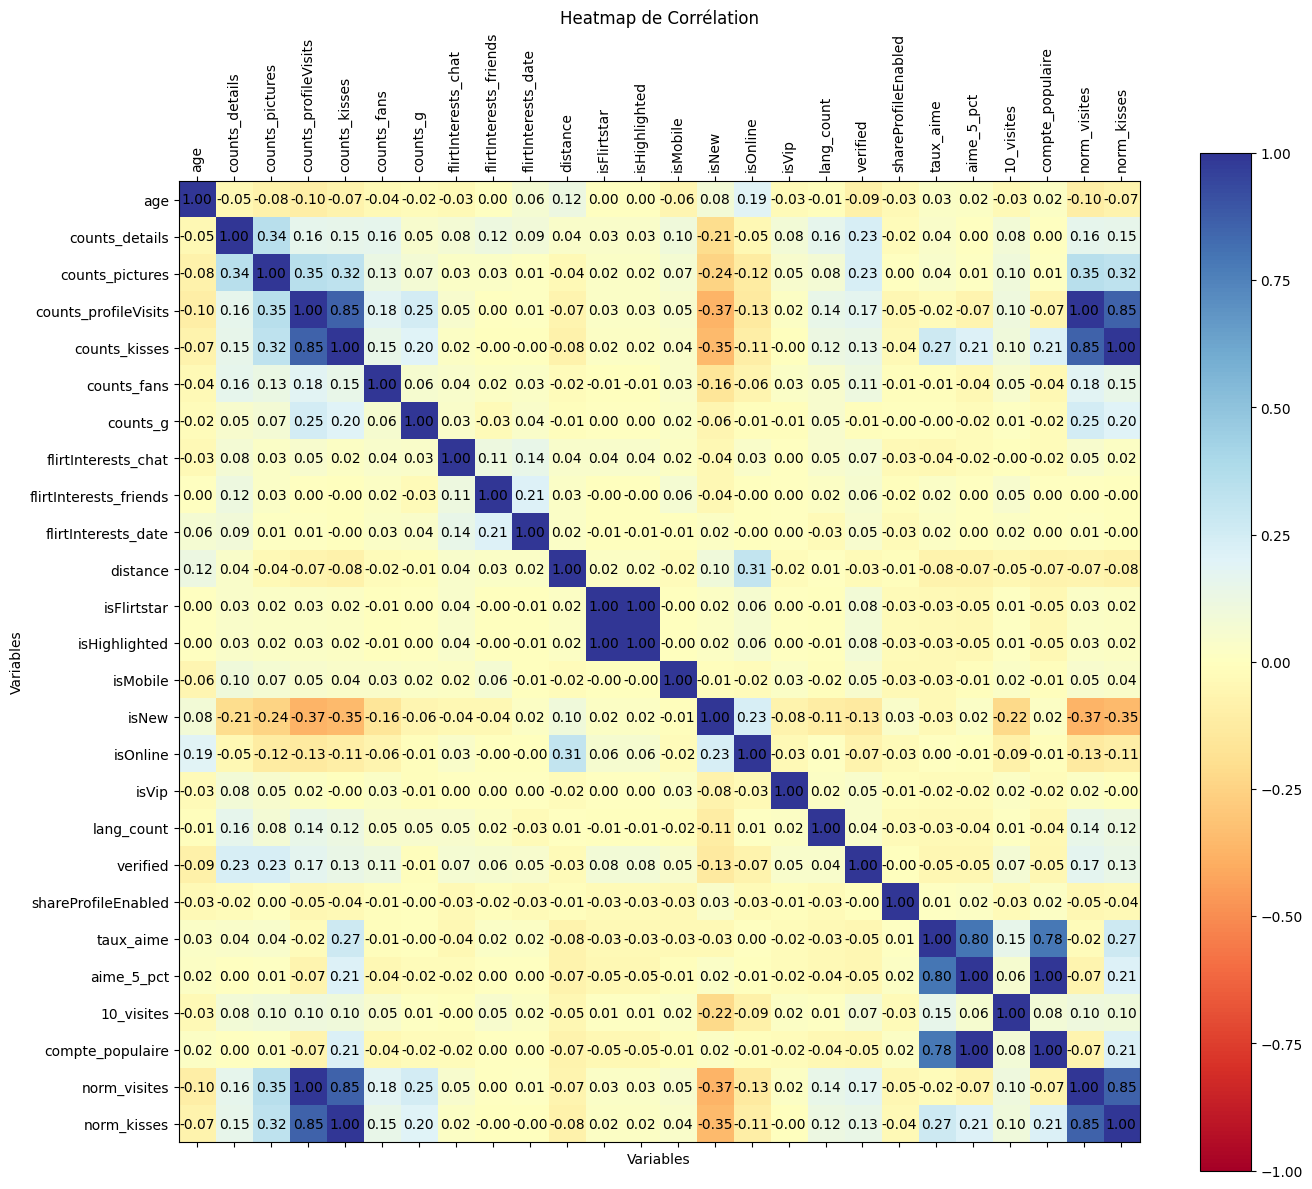

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Définir les options d'affichage pour montrer toutes les colonnes
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes

def printCorrelationHeatMap(dataset):
    # Sélectionner uniquement les colonnes numériques
    
    # Obtenir toutes les colonnes numériques
    numeric_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()

    # Créer un nouveau DataFrame avec seulement les colonnes numériques
    df_numeric = dataset[numeric_columns]
    
    # Calculer la matrice de corrélation
    corr_matrix = df_numeric.corr()
    
    print("\nMatrice de corrélation sous forme de heatmap")
    fig = plt.figure(figsize=(14, 12))  # Ajuster la taille de la figure selon les besoins
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr_matrix, cmap='RdYlBu', vmin=-1, vmax=1)  # Colormap 'RdYlBu' pour une meilleure visualisation
    fig.colorbar(cax)
    
    # Configurer les étiquettes des axes x et y
    ax.set_xticks(np.arange(len(corr_matrix.columns)))
    ax.set_yticks(np.arange(len(corr_matrix.columns)))
    
    # Faire pivoter les étiquettes de l'axe x verticalement
    ax.set_xticklabels(corr_matrix.columns, rotation=90)
    ax.set_yticklabels(corr_matrix.columns)
    
    plt.xlabel('Variables')  # Étiquette de l'axe x
    plt.ylabel('Variables')  # Étiquette de l'axe y
    plt.title('Heatmap de Corrélation')  # Titre du heatmap
    
    # Afficher les valeurs de corrélation dans chaque cellule
    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix.columns)):
            text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
    
    plt.tight_layout()  # Ajuster la disposition pour éviter que les étiquettes ne soient coupées
    plt.show()

# Créer une heatmap de corrélation pour toutes les variables numériques
printCorrelationHeatMap(dataset)
